# Customer Churn

The goal of this project is to create a model to predict whether or not a customer will churn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


## Exploratory Data Analysis

**Is there any NaN cells?**

In [9]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**The balance of the class labels (Churn)**

<AxesSubplot:xlabel='Churn', ylabel='count'>

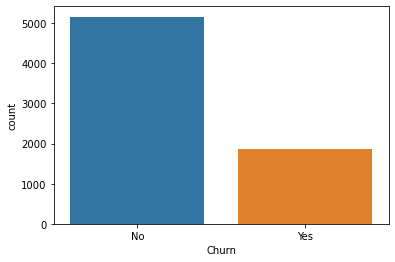

In [10]:
sns.countplot(data=df, x='Churn')

**Distribution of Total Charges between Churn categories**

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

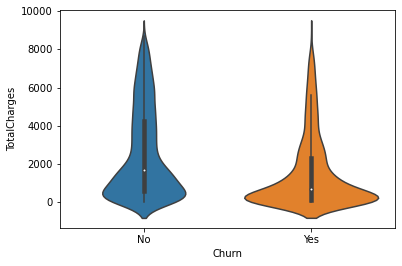

In [12]:
sns.violinplot(data=df, x='Churn', y='TotalCharges')

**Distribution of Total Charges per Contract Type**

<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

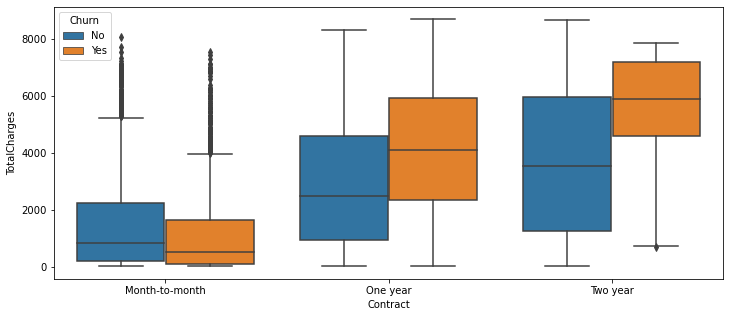

In [20]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x='Contract', y='TotalCharges', hue='Churn')

**Feature Correlation to Yes Churn**

In [41]:
df_features = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']]

In [42]:
df_features = pd.get_dummies(df_features)

In [43]:
df_features = df_features.drop('Churn_No', axis=1)

In [52]:
correlations = df_features.corr()['Churn_Yes'].drop('Churn_Yes', axis=0).sort_values()

In [60]:
df_correlation = pd.DataFrame(data=correlations)

Text(0.5, 0, 'Feature')

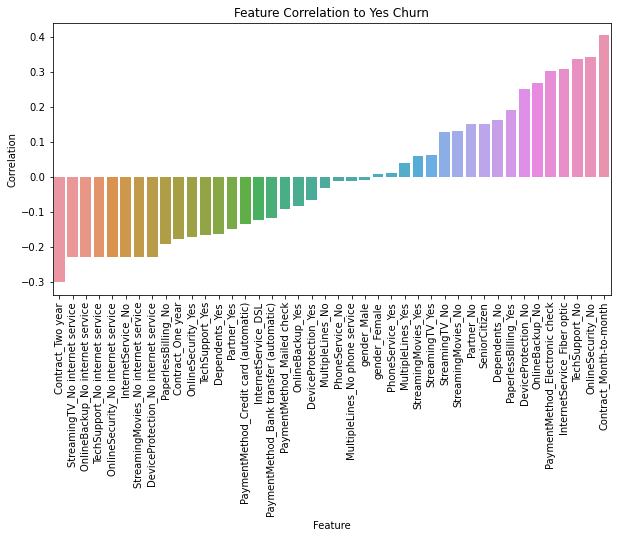

In [67]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_correlation, x=df_correlation.index ,y='Churn_Yes')
plt.xticks(rotation=90)
plt.title('Feature Correlation to Yes Churn')
plt.ylabel('Correlation')
plt.xlabel('Feature')

## Churn Analysis

This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments. 

**Contract Types Available**

In [69]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)